<a href="https://colab.research.google.com/github/TurMod/Data-Science-HW/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'mse', 'mae']
)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

history = model.fit(
    x_train,
    y_train,
    epochs=18,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/18
469/469 [==============================] - 32s 67ms/step - loss: 0.6773 - accuracy: 0.7549 - mse: 0.0334 - mae: 0.0684 - val_loss: 0.4406 - val_accuracy: 0.8369 - val_mse: 0.0231 - val_mae: 0.0499
Epoch 2/18
469/469 [==============================] - 30s 63ms/step - loss: 0.4466 - accuracy: 0.8384 - mse: 0.0230 - mae: 0.0473 - val_loss: 0.3691 - val_accuracy: 0.8681 - val_mse: 0.0192 - val_mae: 0.0404
Epoch 3/18
469/469 [==============================] - 28s 60ms/step - loss: 0.3922 - accuracy: 0.8593 - mse: 0.0203 - mae: 0.0418 - val_loss: 0.3448 - val_accuracy: 0.8736 - val_mse: 0.0181 - val_mae: 0.0359
Epoch 4/18
469/469 [==============================] - 28s 60ms/step - loss: 0.3615 - accuracy: 0.8702 - mse: 0.0187 - mae: 0.0387 - val_loss: 0.3141 - val_accuracy: 0.8856 - val_mse: 0.0164 - val_mae: 0.0334
Epoch 5/18
469/469 [==============================] - 28s 60ms/step - loss: 0.3316 - accuracy: 0.8783 - mse: 0.0174 - mae: 0.0358 - val_loss: 0.3020 - val_accuracy: 0.8

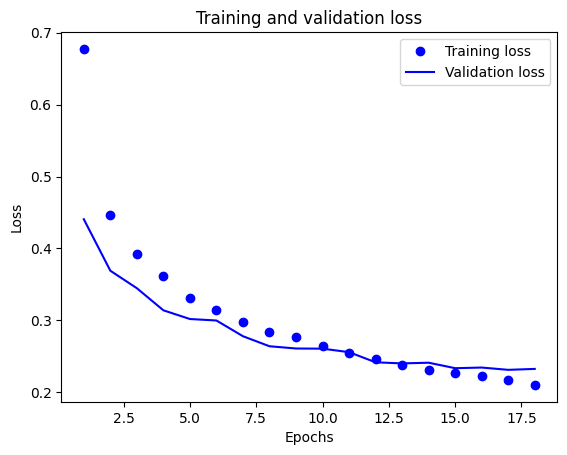

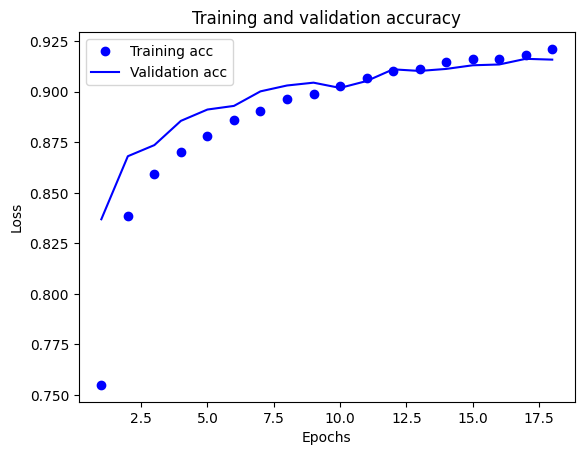

In [6]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [7]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 2s 5ms/step - loss: 0.2327 - accuracy: 0.9159 - mse: 0.0122 - mae: 0.0233
[0.232686847448349, 0.9158999919891357, 0.012151306495070457, 0.023287635296583176]
